<>:73: SyntaxWarning: invalid escape sequence '\G'
<>:73: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\1741319811.py:73: SyntaxWarning: invalid escape sequence '\G'
  cleaned_customers.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_customers.csv")


EDA on original_customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None
   CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Po

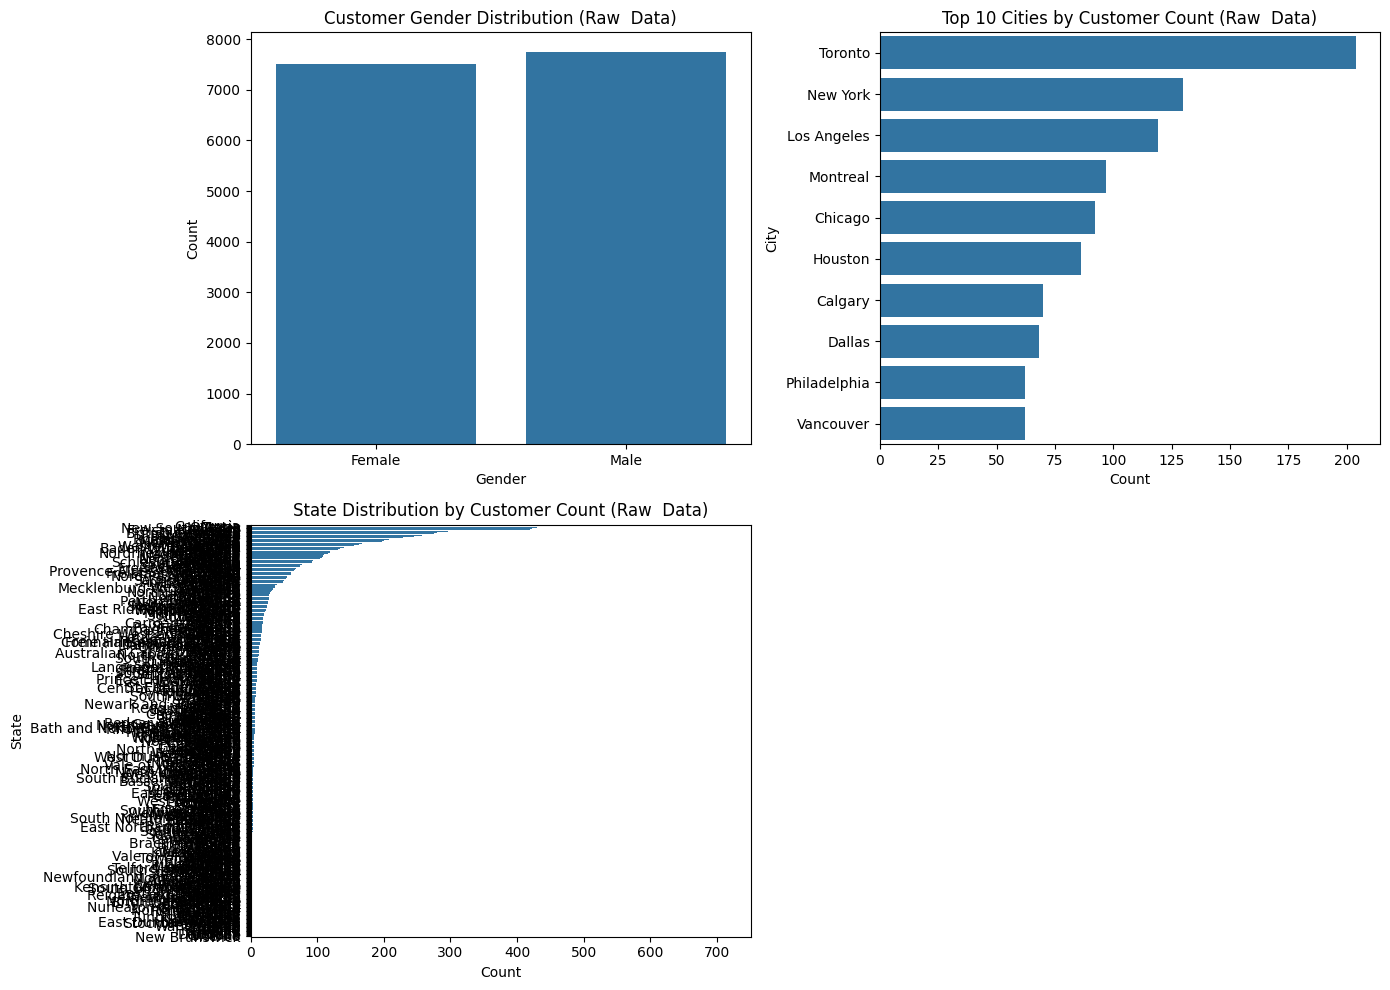

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\1741319811.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  original_customers['City'].fillna('Unknown', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\1741319811.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Customers data cleaning completed
EDA on Cleaned Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   15266 non-null  int64 
 1   Customer_ID  15266 non-null  int64 
 2   Gender       15266 non-null  object
 3   Name         15266 non-null  object
 4   City         15266 non-null  object
 5   State Code   15266 non-null  object
 6   State        15266 non-null  object
 7   Zip_Code     15266 non-null  object
 8   Country      15266 non-null  object
 9   Continent    15266 non-null  object
 10  Birthday     15266 non-null  object
 11  Age          15266 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.4+ MB
None
   Unnamed: 0  Customer_ID  Gender               Name            City  \
0           0          301  Female      Lilly Harding  WANDEARAH EAST   
1           1          325  Female       Madison Hull      MOU

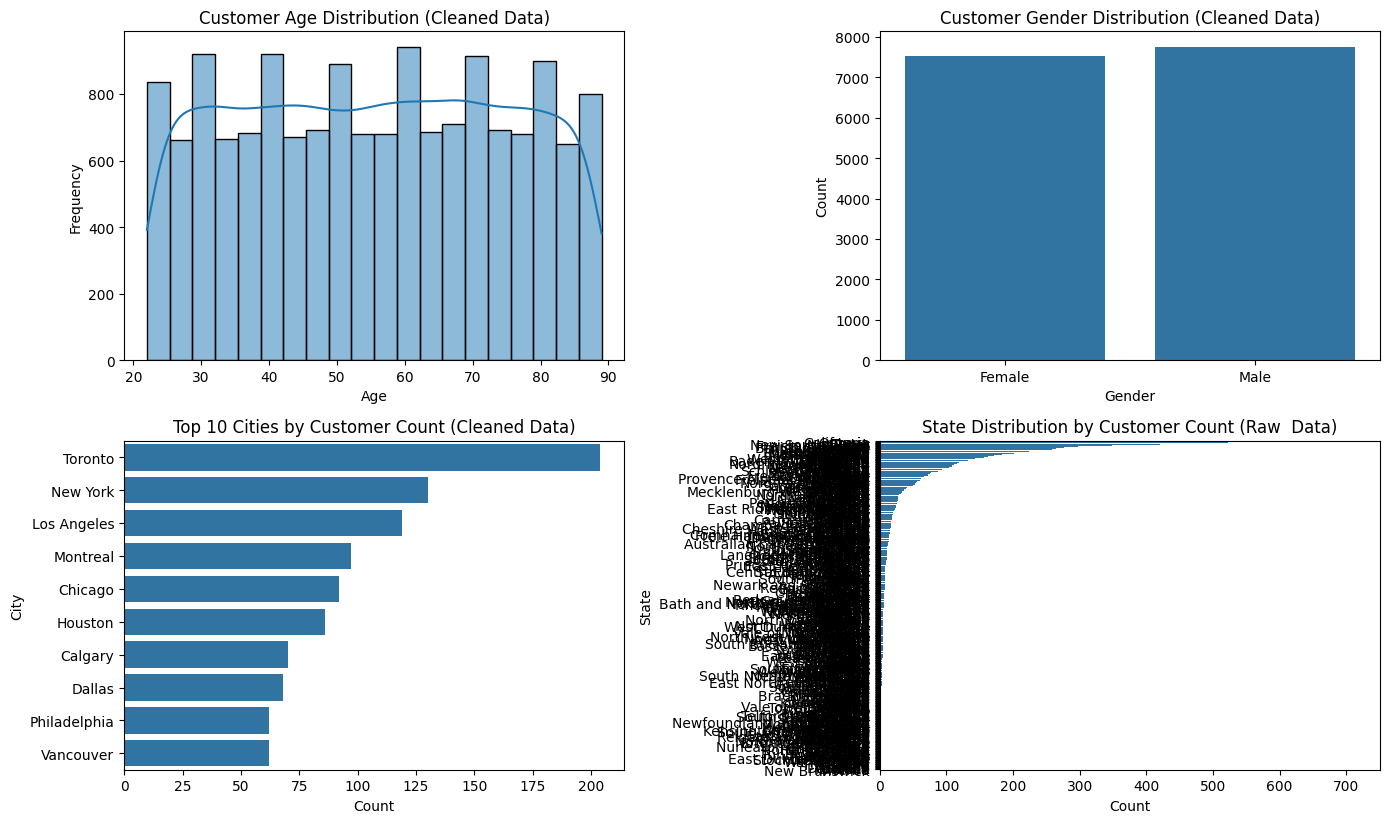

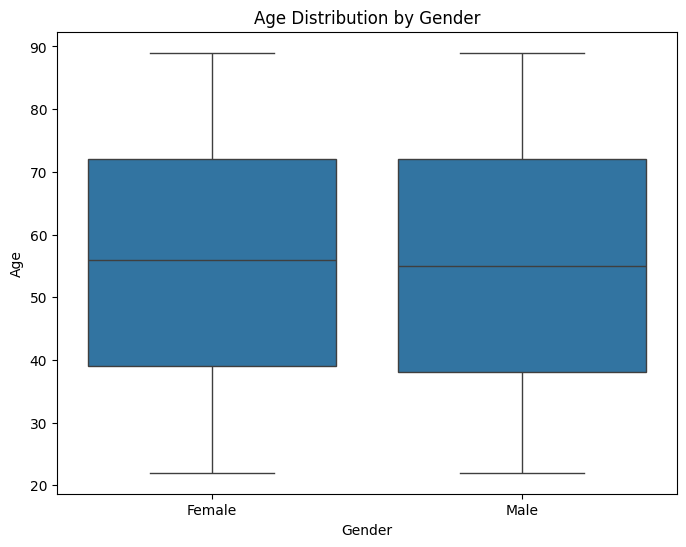

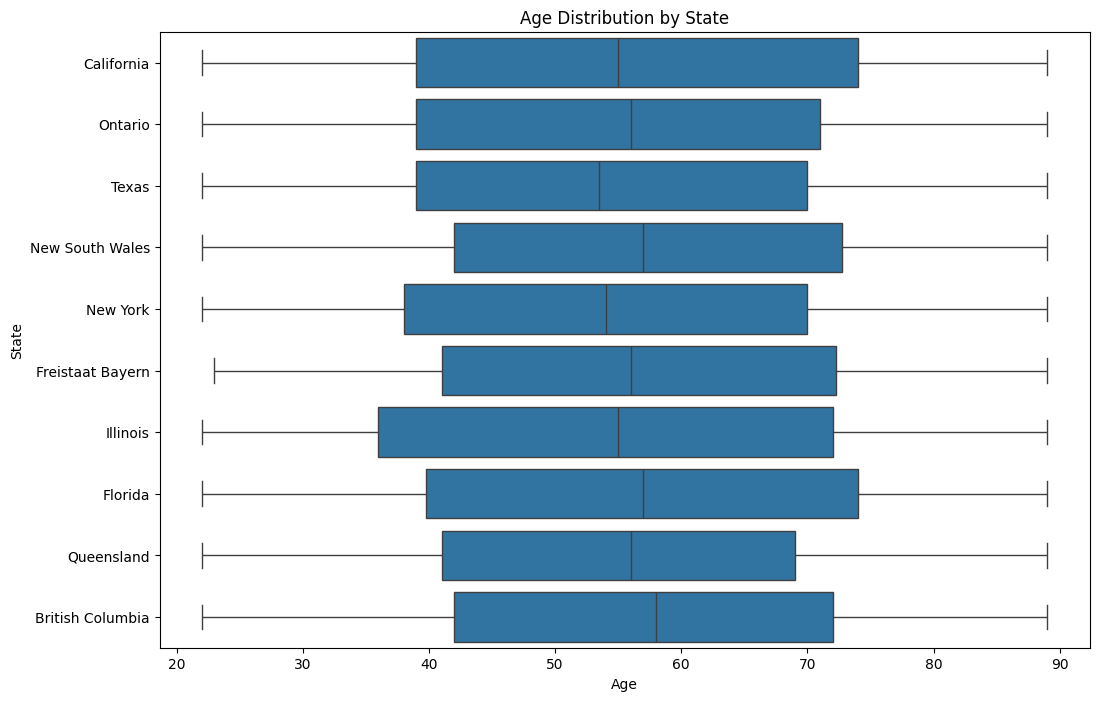

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
original_customers = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\data\Customers.csv",encoding = 'ISO-8859-1')

# EDA on original_customers
print("EDA on original_customers")
print(original_customers.info())
print(original_customers.head())
print(original_customers.describe(include='all'))
print(original_customers.isnull().sum())

plt.figure(figsize=(14,10))

# 1.Gender Distribution (Raw Data)
plt.subplot(2,2,1)
sns.countplot(x='Gender',data = original_customers)
plt.title("Customer Gender Distribution (Raw  Data)")
plt.xlabel('Gender')
plt.ylabel('Count')

# 2.City Distribution (Raw Data)
plt.subplot(2,2,2)
sns.countplot(y='City', data = original_customers, order=original_customers['City'].value_counts().index[:10])
plt.title("Top 10 Cities by Customer Count (Raw  Data)")
plt.xlabel('Count')
plt.ylabel('City')

# 3.State Distribution (Raw Data)

plt.subplot(2,2,3)
sns.countplot(y='State', data = original_customers, order=original_customers['State'].value_counts().index)
plt.title("State Distribution by Customer Count (Raw  Data)")
plt.xlabel('Count')
plt.ylabel('State')

plt.tight_layout()
plt.show()

# Data Cleaning

# Handling Missing Values

original_customers['City'].fillna('Unknown', inplace=True)
original_customers['State'].fillna('Unknown', inplace=True)
original_customers['State Code'].fillna('Unknown', inplace=True)
original_customers['Zip Code'].fillna('Unknown', inplace=True)
original_customers['Country'].fillna('Unknown', inplace=True)
original_customers['Continent'].fillna('Unknown', inplace=True)

# Corrected Data Types
original_customers['Birthday'] = pd.to_datetime(original_customers['Birthday'],errors = 'coerce')

# Remove Dublicates (excluding primary key and unique key)
cleaned_customers = original_customers.drop_duplicates(subset=[col for col in original_customers.columns if col not in ['CustomerKey']])

# Renaming colums
cleaned_customers.rename(columns={'CustomerKey': 'Customer_ID', 'Zip Code': 'Zip_Code', 'State_Code': 'State Code'}, inplace=True)

# Handling Categorical Data
cleaned_customers['Gender'] = cleaned_customers['Gender'].astype('category')

# calculate age

cleaned_customers['Age'] = (pd.Timestamp.now() - cleaned_customers['Birthday']).dt.total_seconds() / (60*60*24*365.25)
cleaned_customers['Age'] = cleaned_customers['Age'] .astype(int)


# save Cleaned object

cleaned_customers.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_customers.csv")

print("Customers data cleaning completed")

# Load Cleaned Dataset
customers = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_customers.csv")

# EDA on Cleaned data
print("EDA on Cleaned Data")
print(customers.info())
print(customers.head())
print(customers.describe(include='all'))
print(customers.isnull().sum())

plt.figure(figsize = (14,12))

# 1.Age Distribution (Cleaned Data)
plt.subplot(3,2,1)
sns.histplot(customers['Age'],bins=20,kde=True)
plt.title('Customer Age Distribution (Cleaned Data)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Gender Distribution
plt.subplot(3,2,2)
sns.countplot(x='Gender',data=customers)
plt.title('Customer Gender Distribution (Cleaned Data)')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. City Distribution (Top 10 cities)
plt.subplot(3,2,3)
sns.countplot(y='City', data = customers, order=customers['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Customer Count (Cleaned Data)')
plt.xlabel('Count')
plt.ylabel('City')

# 4.State Distribution (Cleaned Data)
plt.subplot(3,2,4)
sns.countplot(y='State', data = customers, order=customers['State'].value_counts().index)
plt.title("State Distribution by Customer Count (Raw  Data)")
plt.xlabel('Count')
plt.ylabel('State')

plt.tight_layout()
plt.show()

# 5. Age by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender',y='Age',data= customers)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# 6.Age by State (top 10 states by customer count)
plt.figure(figsize=(12,8))
sns.boxplot(y='State',x='Age',data= customers, order=customers['State'].value_counts().index[:10])
plt.title('Age Distribution by State')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()


<>:80: SyntaxWarning: invalid escape sequence '\G'
<>:80: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\2877022328.py:80: SyntaxWarning: invalid escape sequence '\G'
  cleaned_sales.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_sales.csv",index=False)


EDA on original_sales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None
   Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1   1/1/2016           NaN       265598        10   
1        366001          1   1/1/2016     1/13/2016      1269051         0   
2        366001          2   1/1/2016     1/13/2016      1269051         0   
3        366002          1   1

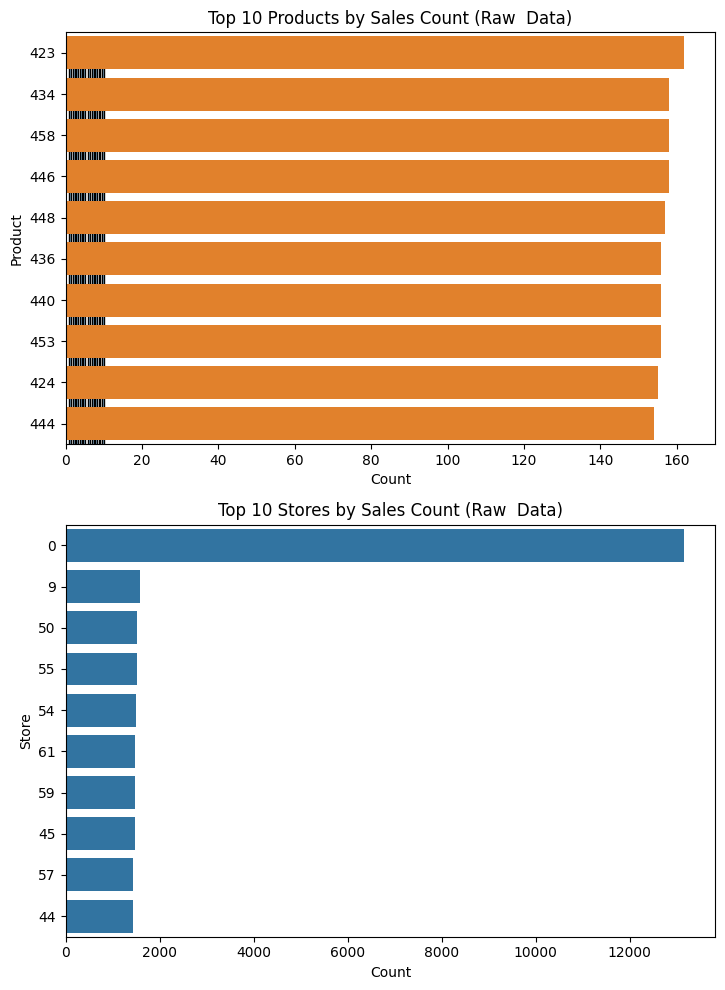

Sales data cleaning completed.
EDA on Cleaned Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   CustomerKey    62884 non-null  int64         
 4   StoreKey       62884 non-null  int64         
 5   ProductKey     62884 non-null  int64         
 6   Quantity       62884 non-null  float64       
 7   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 3.8+ MB
None
   Order Number  Line Item Order Date  CustomerKey  StoreKey  ProductKey  \
0        366000          1 2016-01-01       265598        10        1304   
1        366001          1 2016-01-01      1269051         0        1048   
2        366001  

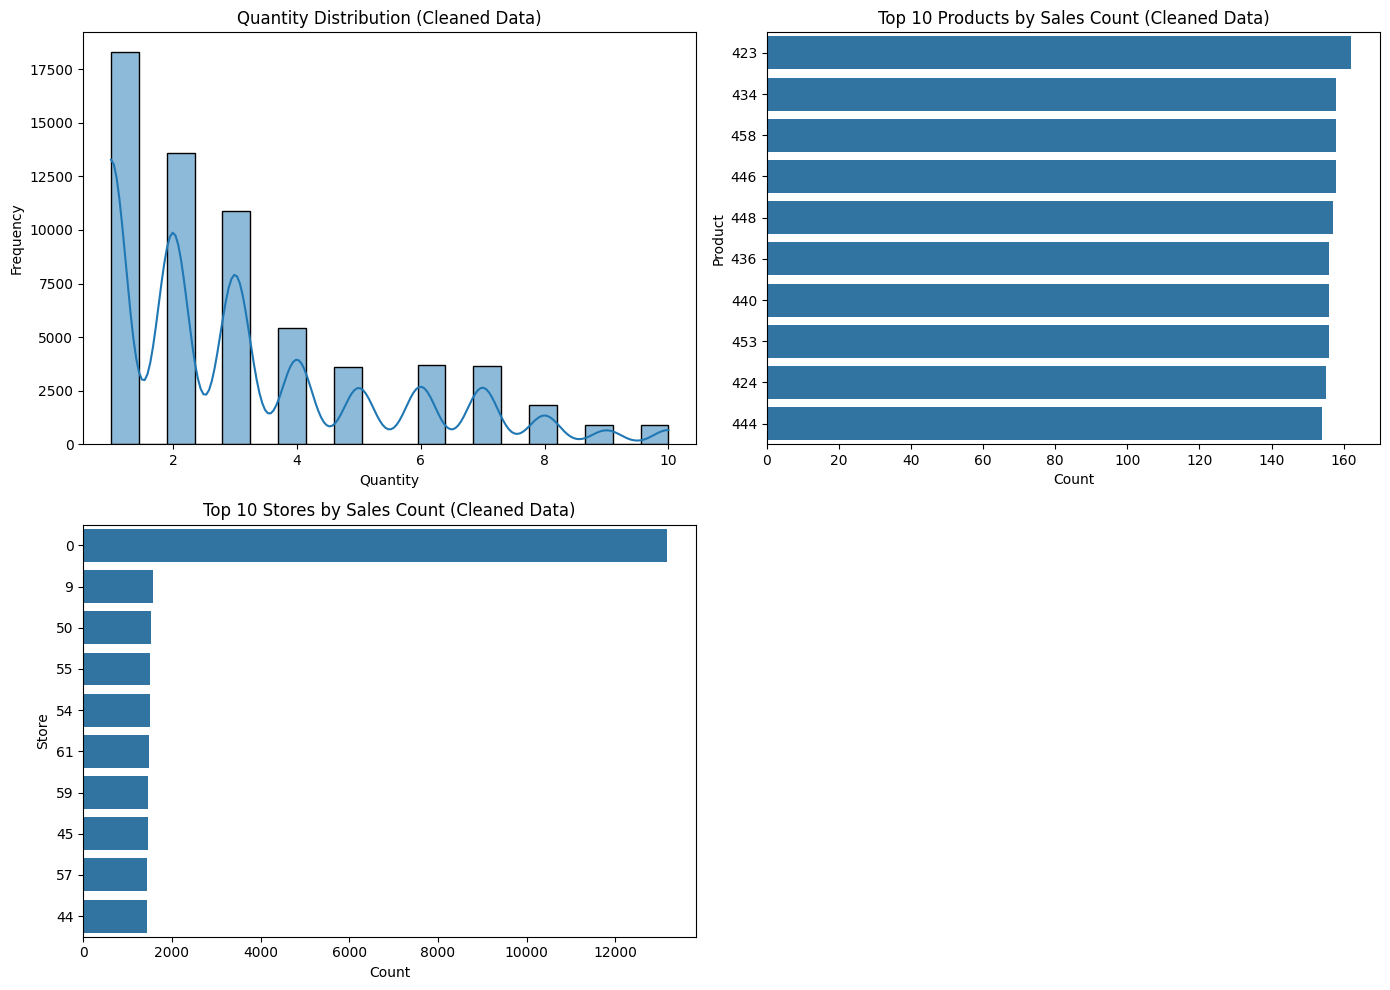

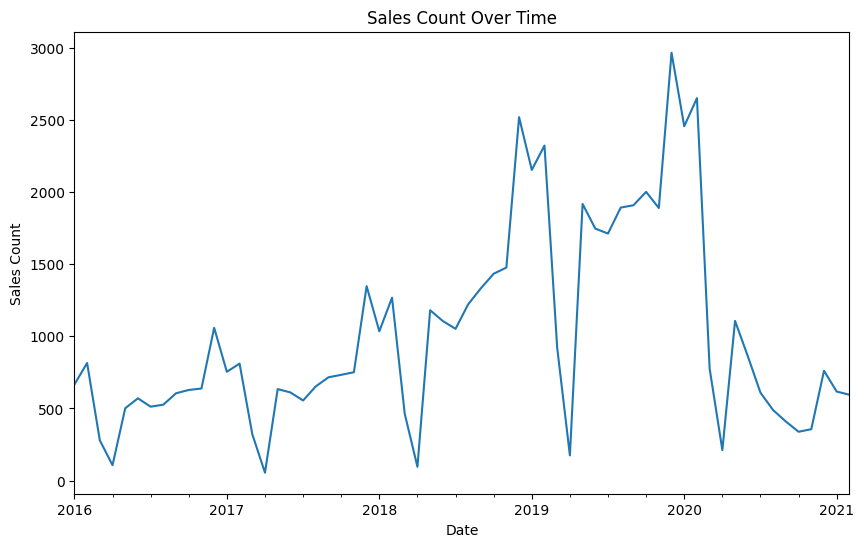

Column 'Sales Value' is not present in the cleaned dataset.


<Figure size 800x600 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load dataset
original_sales = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\data\Sales.csv",encoding = 'ISO-8859-1')

# EDA on original_customers
print("EDA on original_sales")
print(original_sales.info())
print(original_sales.head())
print(original_sales.describe(include='all'))
print(original_sales.isnull().sum())

plt.figure(figsize=(14,10))  # Adjust figsize to fit fewer plots

# 1.Quantity Distribution (Raw Data)
plt.subplot(2,2,1)
sns.histplot(original_sales['Quantity'].dropna(),bins=20,kde = True)
plt.title("Quantity Distribution (Raw  Data)")
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# 2.Sales by Product (Top 10 products)(Raw Data)
plt.subplot(2,2,1)
if 'ProductKey' in original_sales.columns:
    sns.countplot(y='ProductKey', data = original_sales, order=original_sales['ProductKey'].value_counts().index[:10])
    plt.title("Top 10 Products by Sales Count (Raw  Data)")
    plt.xlabel('Count')
    plt.ylabel('Product')
else:
    print("Column 'StoreKey' is not present in the raw dataset.")

# 3.Sales by Store (top 10 stores)(Raw Data)

plt.subplot(2,2,3)
if 'StoreKey' in original_sales.columns:
    sns.countplot(y='StoreKey', data = original_sales, order=original_sales['StoreKey'].value_counts().index[:10])
    plt.title("Top 10 Stores by Sales Count (Raw  Data)")
    plt.xlabel('Count')
    plt.ylabel('Store')
else:
    print("Column 'StoreKey' is not present in the raw dataset.")

# Remove redundant plot for sales value Distribution

plt.tight_layout()
plt.show()


# Data Cleaning

# Define primary and unique key columns

primary_keys_sales = ['Order Number', 'Line Item','CustomerKey','StoreKey', 'ProductKey']

# handling Missing values

original_sales.dropna(subset=['Order Date'],inplace=True)

# Correcting Data types

original_sales['Order Date'] = pd.to_datetime(original_sales['Order Date'],errors='coerce')

# Handling outliers (, space extreme values in quantity)
original_sales['Quantity'] = np.where(original_sales['Quantity'] > original_sales['Quantity'].quantile(0.99),original_sales['Quantity'].quantile(0.99),original_sales['Quantity'])

# Removing Dublicates
cleaned_sales = original_sales.drop_duplicates()

# High percentage missing values
threshold = 0.5
columns_to_drop = [col for col in cleaned_sales.columns if cleaned_sales[col].isnull().sum() / len(cleaned_sales) > threshold and col not in primary_keys_sales]

# Drop irrelevant,low variance,reduntant,correlation
cleaned_sales.drop(columns=set(columns_to_drop),inplace=True)

# save cleaned Dataset
cleaned_sales.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_sales.csv",index=False)
print("Sales data cleaning completed.")

# Load Cleaned Dataset

sales = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_sales.csv")

# Ensure 'Order Date' is in datetime format after cleaning
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')

# EDA on Cleaned Data
print("EDA on Cleaned Data")
print(sales.info())
print(sales.head())
print(sales.describe(include='all'))
print(sales.isnull().sum())

plt.figure(figsize=(14, 10))  

# 1. Quantity Distribution (Cleaned Data)
plt.subplot(2, 2, 1)
sns.histplot(sales['Quantity'].dropna(), bins=20, kde=True)
plt.title('Quantity Distribution (Cleaned Data)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# 2. Sales by Product (Top 10 Products) (Cleaned Data)
plt.subplot(2, 2, 2)
if 'ProductKey' in sales.columns:
    sns.countplot(y='ProductKey', data=sales, order=sales['ProductKey'].value_counts().index[:10])
    plt.title('Top 10 Products by Sales Count (Cleaned Data)')
    plt.xlabel('Count')
    plt.ylabel('Product')
else:
    print("Column 'ProductKey' is not present in the cleaned dataset.")

# 3. Sales by Store (Top 10 Stores) (Cleaned Data)
plt.subplot(2, 2, 3)
if 'StoreKey' in sales.columns:
    sns.countplot(y='StoreKey', data=sales, order=sales['StoreKey'].value_counts().index[:10])
    plt.title('Top 10 Stores by Sales Count (Cleaned Data)')
    plt.xlabel('Count')
    plt.ylabel('Store')
else:
    print("Column 'StoreKey' is not present in the cleaned dataset.")

# Remove redundant plot for Sales Value Distribution (Cleaned Data)

plt.tight_layout()
plt.show()

# Additional Plots (Cleaned Data)

# 4. Sales over Time
plt.figure(figsize=(10, 6))
if 'Order Date' in sales.columns:
    sales['Order Date'].groupby(sales['Order Date'].dt.to_period('M')).count().plot()
    plt.title('Sales Count Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Count')
else:
    print("Column 'Order Date' is not present in the cleaned dataset.")
plt.show()

# 5. Quantity vs Sales Value
plt.figure(figsize=(8, 6))
if 'Sales Value' in sales.columns:
    sns.scatterplot(x='Quantity', y='Sales Value', data=sales)
    plt.title('Quantity vs Sales Value')
    plt.xlabel('Quantity')
    plt.ylabel('Sales Value')
else:
    print("Column 'Sales Value' is not present in the cleaned dataset.")
plt.show()


<>:70: SyntaxWarning: invalid escape sequence '\G'
<>:70: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\2945357460.py:70: SyntaxWarning: invalid escape sequence '\G'
  cleaned_stores.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_stores.csv", index=False)


EDA on Raw Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB
None
   StoreKey    Country                         State  Square Meters  Open Date
0         1  Australia  Australian Capital Territory          595.0   1/1/2008
1         2  Australia            Northern Territory          665.0  1/12/2008
2         3  Australia               South Australia         2000.0   1/7/2012
3         4  Australia                      Tasmania         2000.0   1/1/2010
4         5  Australia                      Victoria         2000.0  12/9/2015
         StoreKey        Country 

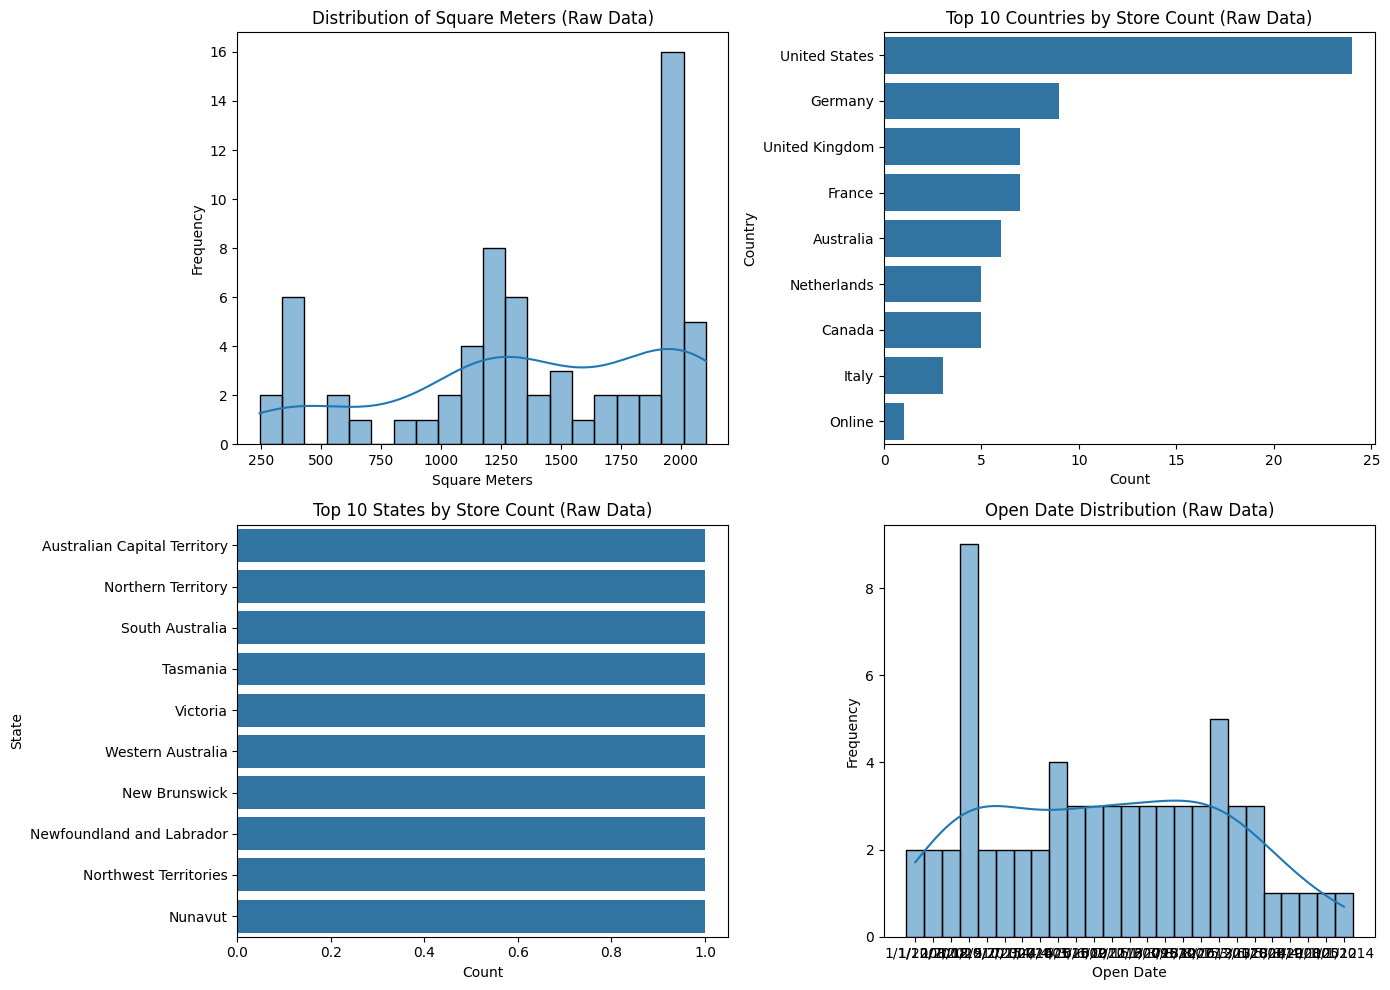

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\2945357460.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  original_stores['Country'].fillna('Unknown', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\2945357460.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Stores data cleaning completed.
EDA on Cleaned Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       67 non-null     int64         
 1   Country        67 non-null     object        
 2   State          67 non-null     object        
 3   Square Meters  67 non-null     float64       
 4   Open Date      67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB
None
   StoreKey    Country                         State  Square Meters  Open Date
0         1  Australia  Australian Capital Territory          595.0 2008-01-01
1         2  Australia            Northern Territory          665.0 2008-01-12
2         3  Australia               South Australia         2000.0 2012-01-07
3         4  Australia                      Tasmania         2000.0 2010-01-01
4       

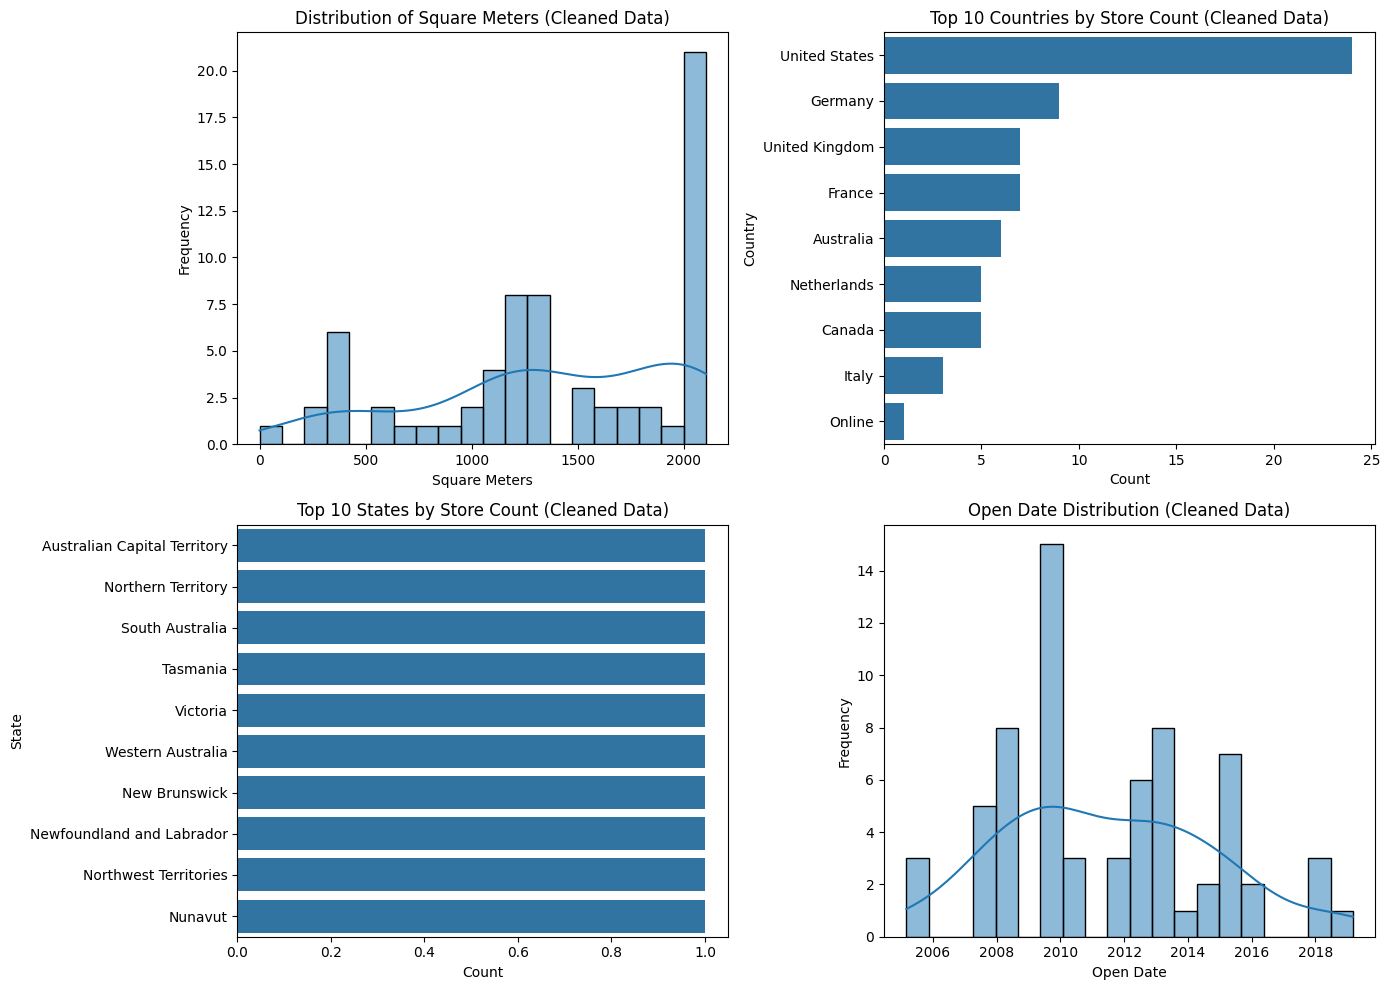

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw dataset
original_stores = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\data\Stores.csv", encoding='ISO-8859-1')

# EDA on Raw Data
print("EDA on Raw Data")
print(original_stores.info())
print(original_stores.head())
print(original_stores.describe(include='all'))
print(original_stores.isnull().sum())

plt.figure(figsize=(14, 10))

# 1. Distribution of Square Meters (Raw Data)
plt.subplot(2, 2, 1)
sns.histplot(original_stores['Square Meters'].dropna(), bins=20, kde=True)
plt.title('Distribution of Square Meters (Raw Data)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')

# 2. Stores by Country (Top 10 Countries) (Raw Data)
plt.subplot(2, 2, 2)
if 'Country' in original_stores.columns:
    sns.countplot(y='Country', data=original_stores, order=original_stores['Country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Store Count (Raw Data)')
    plt.xlabel('Count')
    plt.ylabel('Country')
else:
    print("Column 'Country' is not present in the raw dataset.")

# 3. Stores by State (Top 10 States) (Raw Data)
plt.subplot(2, 2, 3)
if 'State' in original_stores.columns:
    sns.countplot(y='State', data=original_stores, order=original_stores['State'].value_counts().index[:10])
    plt.title('Top 10 States by Store Count (Raw Data)')
    plt.xlabel('Count')
    plt.ylabel('State')
else:
    print("Column 'State' is not present in the raw dataset.")

# 4. Open Date Distribution (Raw Data)
plt.subplot(2, 2, 4)
if 'Open Date' in original_stores.columns:
    sns.histplot(original_stores['Open Date'].dropna(), bins=20, kde=True)
    plt.title('Open Date Distribution (Raw Data)')
    plt.xlabel('Open Date')
    plt.ylabel('Frequency')
else:
    print("Column 'Open Date' is not present in the raw dataset.")

plt.tight_layout()
plt.show()

# Data Cleaning
# Handling Missing Values
original_stores['Country'].fillna('Unknown', inplace=True)
original_stores['State'].fillna('Unknown', inplace=True)
original_stores['Square Meters'].fillna(0, inplace=True)

# Correcting Data Types
original_stores['Open Date'] = pd.to_datetime(original_stores['Open Date'], errors='coerce')

# Removing Duplicates (excluding primary key)
cleaned_stores = original_stores.drop_duplicates(subset=[col for col in original_stores.columns if col not in ['StoreKey']])

# Save cleaned dataset
cleaned_stores.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_stores.csv", index=False)

print("Stores data cleaning completed.")

# Load cleaned dataset
stores = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_stores.csv")

# Ensure 'Open Date' is in datetime format after cleaning
stores['Open Date'] = pd.to_datetime(stores['Open Date'], errors='coerce')

# EDA on Cleaned Data
print("EDA on Cleaned Data")
print(stores.info())
print(stores.head())
print(stores.describe(include='all'))
print(stores.isnull().sum())

plt.figure(figsize=(14, 10))

# 1. Distribution of Square Meters (Cleaned Data)
plt.subplot(2, 2, 1)
sns.histplot(stores['Square Meters'].dropna(), bins=20, kde=True)
plt.title('Distribution of Square Meters (Cleaned Data)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')

# 2. Stores by Country (Top 10 Countries) (Cleaned Data)
plt.subplot(2, 2, 2)
if 'Country' in stores.columns:
    sns.countplot(y='Country', data=stores, order=stores['Country'].value_counts().index[:10])
    plt.title('Top 10 Countries by Store Count (Cleaned Data)')
    plt.xlabel('Count')
    plt.ylabel('Country')
else:
    print("Column 'Country' is not present in the cleaned dataset.")

# 3. Stores by State (Top 10 States) (Cleaned Data)
plt.subplot(2, 2, 3)
if 'State' in stores.columns:
    sns.countplot(y='State', data=stores, order=stores['State'].value_counts().index[:10])
    plt.title('Top 10 States by Store Count (Cleaned Data)')
    plt.xlabel('Count')
    plt.ylabel('State')
else:
    print("Column 'State' is not present in the cleaned dataset.")

# 4. Open Date Distribution (Cleaned Data)
plt.subplot(2, 2, 4)
if 'Open Date' in stores.columns:
    sns.histplot(stores['Open Date'].dropna(), bins=20, kde=True)
    plt.title('Open Date Distribution (Cleaned Data)')
    plt.xlabel('Open Date')
    plt.ylabel('Frequency')
else:
    print("Column 'Open Date' is not present in the cleaned dataset.")

plt.tight_layout()
plt.show()

<>:74: SyntaxWarning: invalid escape sequence '\G'
<>:74: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\775578988.py:74: SyntaxWarning: invalid escape sequence '\G'
  products.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_products.csv", index=False)


EDA on Raw Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
None
   ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3       

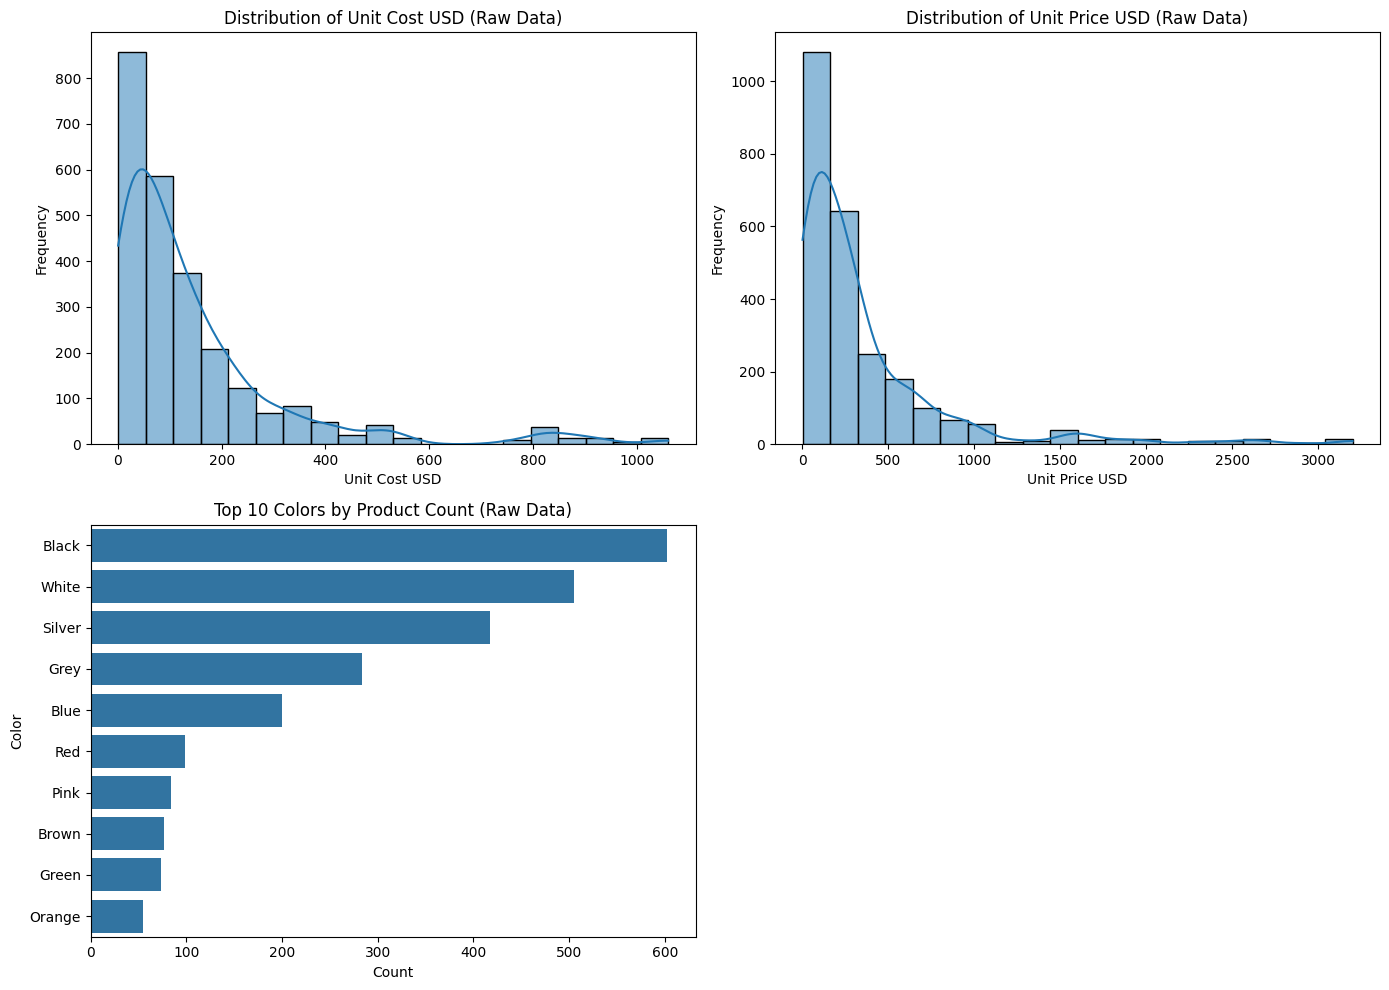

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\775578988.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['Color'].fillna('Unknown', inplace=True)


Converted Unit Cost USD to numeric successfully.
Converted Unit Price USD to numeric successfully.
Products data cleaning completed.
EDA on Cleaned Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB
None
   ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso 

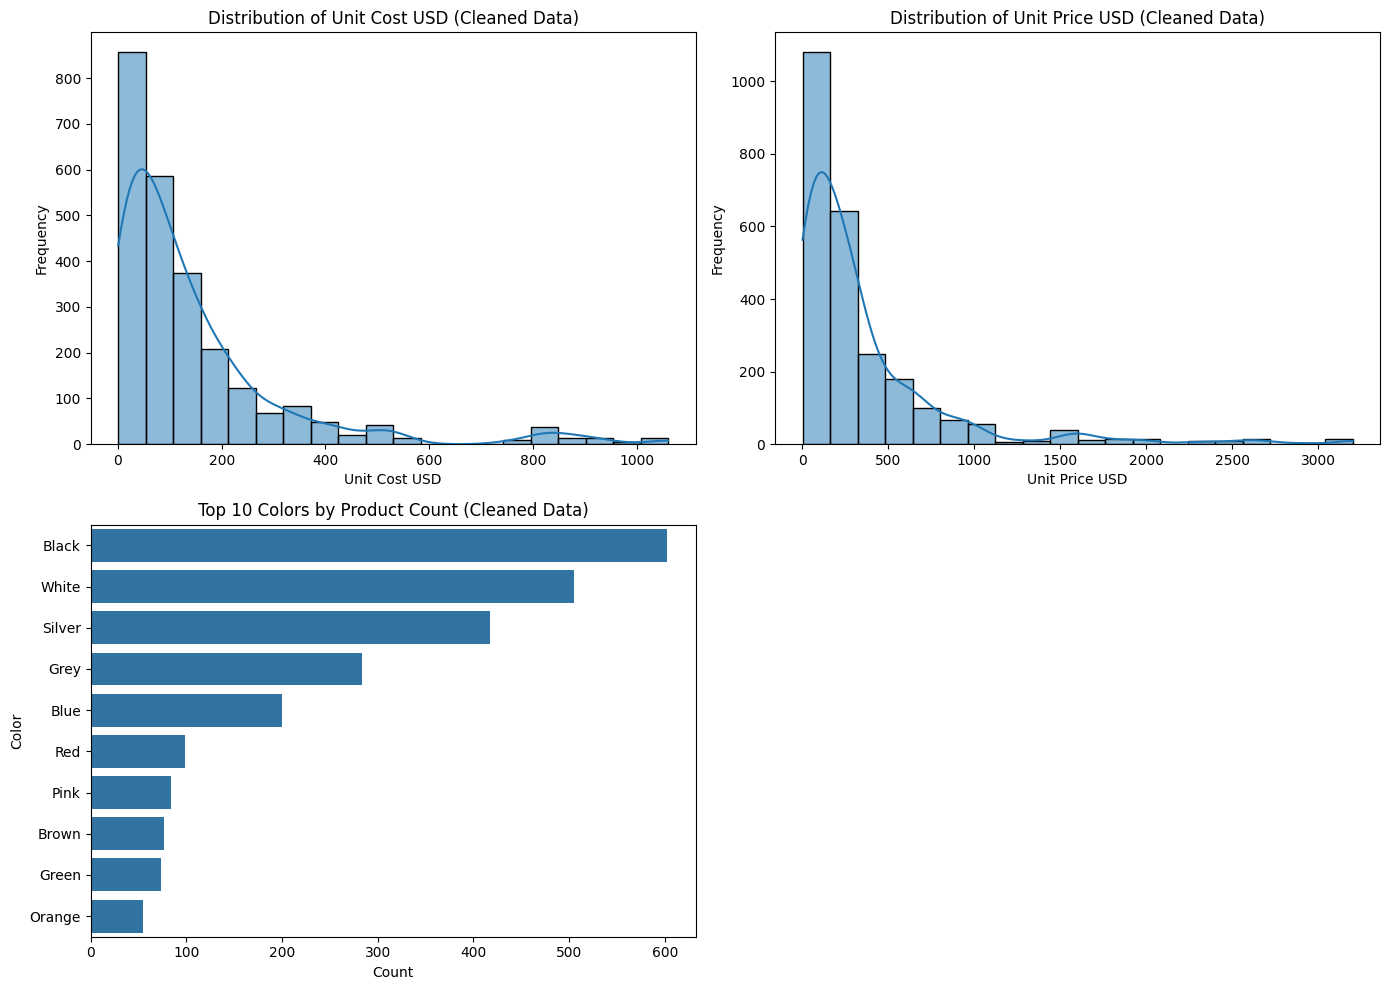

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw dataset
original_products = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\data\Products.csv", encoding='ISO-8859-1')

# EDA on Raw Data
print("EDA on Raw Data")
print(original_products.info())
print(original_products.head())
print(original_products.describe(include='all'))
print(original_products.isnull().sum())

plt.figure(figsize=(14, 10))

# 1. Distribution of Unit Cost USD (Raw Data)
plt.subplot(2, 2, 1)
if 'Unit Cost USD' in original_products.columns:
    sns.histplot(original_products['Unit Cost USD'].str.replace('$', '').str.replace(',', '').dropna().astype(float), bins=20, kde=True)
    plt.title('Distribution of Unit Cost USD (Raw Data)')
    plt.xlabel('Unit Cost USD')
    plt.ylabel('Frequency')

# 2. Distribution of Unit Price USD (Raw Data)
plt.subplot(2, 2, 2)
if 'Unit Price USD' in original_products.columns:
    sns.histplot(original_products['Unit Price USD'].str.replace('$', '').str.replace(',', '').dropna().astype(float), bins=20, kde=True)
    plt.title('Distribution of Unit Price USD (Raw Data)')
    plt.xlabel('Unit Price USD')
    plt.ylabel('Frequency')

# 3. Product Count by Color (Raw Data)
plt.subplot(2, 2, 3)
if 'Color' in original_products.columns:
    sns.countplot(y='Color', data=original_products, order=original_products['Color'].value_counts().index[:10])
    plt.title('Top 10 Colors by Product Count (Raw Data)')
    plt.xlabel('Count')
    plt.ylabel('Color')

plt.tight_layout()
plt.show()

# Data Cleaning

# Make a copy of raw_products to apply cleaning steps
products = original_products.copy()

# Handling Missing Values
products['Color'].fillna('Unknown', inplace=True)

# Removing Duplicates
products.drop_duplicates(inplace=True)

# Remove currency symbols before converting to numeric
for column in ['Unit Cost USD', 'Unit Price USD']:
    products[column] = products[column].str.replace('$', '').str.replace(',', '')

# Correcting Data Types (e.g., converting cost and price to numeric)
for column in ['Unit Cost USD', 'Unit Price USD']:
    try:
        products[column] = pd.to_numeric(products[column], errors='coerce')
        print(f"Converted {column} to numeric successfully.")
    except Exception as e:
        print(f"Error converting {column} to numeric: {e}")

# Additional step to handle missing values in cost and price columns
for column in ['Unit Cost USD', 'Unit Price USD']:
    if products[column].isnull().any():
        products[column].fillna(products[column].median(), inplace=True)
        print(f"Filled missing values in {column} with the median.")

# Save cleaned dataset
products.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_products.csv", index=False)

print("Products data cleaning completed.")

# Load cleaned dataset (if you want to reload it from the saved file, otherwise use the 'products' DataFrame directly)
cleaned_products = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_products.csv")

# EDA on Cleaned Data
print("EDA on Cleaned Data")
print(cleaned_products.info())
print(cleaned_products.head())
print(cleaned_products.describe(include='all'))
print(cleaned_products.isnull().sum())

plt.figure(figsize=(14, 10))

# 1. Distribution of Unit Cost USD (Cleaned Data)
plt.subplot(2, 2, 1)
sns.histplot(cleaned_products['Unit Cost USD'].dropna(), bins=20, kde=True)
plt.title('Distribution of Unit Cost USD (Cleaned Data)')
plt.xlabel('Unit Cost USD')
plt.ylabel('Frequency')

# 2. Distribution of Unit Price USD (Cleaned Data)
plt.subplot(2, 2, 2)
sns.histplot(cleaned_products['Unit Price USD'].dropna(), bins=20, kde=True)
plt.title('Distribution of Unit Price USD (Cleaned Data)')
plt.xlabel('Unit Price USD')
plt.ylabel('Frequency')

# 3. Product Count by Color (Cleaned Data)
plt.subplot(2, 2, 3)
sns.countplot(y='Color', data=cleaned_products, order=cleaned_products['Color'].value_counts().index[:10])
plt.title('Top 10 Colors by Product Count (Cleaned Data)')
plt.xlabel('Count')
plt.ylabel('Color')

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Load raw dataset
original_exchange_rates = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\data\Exchange_Rates.csv", encoding='ISO-8859-1')

# EDA on Raw Data
print("EDA on Raw Data")
print(original_exchange_rates.info())
print(original_exchange_rates.head())
print(original_exchange_rates.describe(include='all'))
print(original_exchange_rates.isnull().sum())

# Data Cleaning

# Make a copy of raw_exchange_rates to apply cleaning steps
cleaned_exchange_rates = original_exchange_rates.copy()

# Correcting Data Types
cleaned_exchange_rates['Date'] = pd.to_datetime(cleaned_exchange_rates['Date'], errors='coerce')

# Removing Duplicates
cleaned_exchange_rates.drop_duplicates(inplace=True)

# Save cleaned dataset
cleaned_exchange_rates.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_exchange_rates.csv", index=False)

print("Exchange rates data cleaning completed.")

# Load cleaned dataset (if you want to reload it from the saved file, otherwise use the 'exchange_rates' DataFrame directly)
cleaned_exchange_rates = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_exchange_rates.csv")


#EDA on Cleaned Data
print("EDA on Cleaned Data")
print(cleaned_exchange_rates.info())
print(cleaned_exchange_rates.head())
print(cleaned_exchange_rates.describe(include='all'))
print(cleaned_exchange_rates.isnull().sum())

EDA on Raw Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB
None
       Date Currency  Exchange
0  1/1/2015      USD    1.0000
1  1/1/2015      CAD    1.1583
2  1/1/2015      AUD    1.2214
3  1/1/2015      EUR    0.8237
4  1/1/2015      GBP    0.6415
             Date Currency      Exchange
count       11215    11215  11215.000000
unique       2243        5           NaN
top     2/20/2021      USD           NaN
freq            5     2243           NaN
mean          NaN      NaN      1.061682
std           NaN      NaN      0.245519
min           NaN      NaN      0.628500
25%           NaN      NaN      0.857800
50%           NaN      NaN      1.000000
75%           NaN      NaN

<>:25: SyntaxWarning: invalid escape sequence '\G'
<>:25: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\2306901806.py:25: SyntaxWarning: invalid escape sequence '\G'
  cleaned_exchange_rates.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\cleaned_exchange_rates.csv", index=False)


In [7]:
import pandas as pd

# Load cleaned datasets
customers = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_customers.csv", encoding='ISO-8859-1')
sales = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_sales.csv", encoding='ISO-8859-1')
stores = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_stores.csv", encoding='ISO-8859-1')
products = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_products.csv", encoding='ISO-8859-1')
exchange_rates = pd.read_csv(r"D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_exchange_rates.csv", encoding='ISO-8859-1')

# Merge sales with customers
sales_customers = pd.merge(sales, customers, how='left', left_on='CustomerKey', right_on='Customer_ID')

# Merge sales_customers with stores
sales_customers_stores = pd.merge(sales_customers, stores, how='left', left_on='StoreKey', right_on='StoreKey')

# Merge sales_customers_stores with products
sales_customers_stores_products = pd.merge(sales_customers_stores, products, how='left', left_on='ProductKey', right_on='ProductKey')

# Save the merged dataset
sales_customers_stores_products.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\merged_data.csv", index=False)
print("Data merging completed.")

<>:20: SyntaxWarning: invalid escape sequence '\G'
<>:20: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4904\2189649243.py:20: SyntaxWarning: invalid escape sequence '\G'
  sales_customers_stores_products.to_csv("D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\\merged_data.csv", index=False)


Data merging completed.


In [1]:
import mysql.connector

In [2]:
con = mysql.connector.connect(
      host = "localhost",
      user = "root",
      password = "12345678",
      database = "data_spark_db"
)
cursor = con.cursor()

In [3]:
import sqlite3
import pandas as pd

# Paths to the cleaned datasets
customers_path = "D:\\GUVI AI & ML\\CapstoneProject2--Data spark\\Cleaned data\\cleaned_customers.csv"
sales_path = "D:\\GUVI AI & ML\\CapstoneProject2--Data spark\\Cleaned data\\cleaned_sales.csv"
stores_path = "D:\\GUVI AI & ML\\CapstoneProject2--Data spark\\Cleaned data\\cleaned_stores.csv"
products_path = "D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_products.csv"
exchange_rates_path = "D:\\GUVI AI & ML\\CapstoneProject2--Data spark\\Cleaned data\\cleaned_exchange_rates.csv"
merged_data_path = "D:\\GUVI AI & ML\\CapstoneProject2--Data spark\\Cleaned data\merged_data.csv"


# Path to the SQLite database
db_path = "D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\Data_Spark.db"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Load each dataset
customers = pd.read_csv(customers_path)
sales = pd.read_csv(sales_path)
stores = pd.read_csv(stores_path)
products = pd.read_csv(products_path)
exchange_rates = pd.read_csv(exchange_rates_path)
merged_data = pd.read_csv(merged_data_path)

# Insert each DataFrame into the SQLite database
customers.to_sql('Customers', conn, if_exists='replace', index=False)
sales.to_sql('Sales', conn, if_exists='replace', index=False)
stores.to_sql('Stores', conn, if_exists='replace', index=False)
products.to_sql('Products', conn, if_exists='replace', index=False)
exchange_rates.to_sql('ExchangeRates', conn, if_exists='replace', index=False)
merged_data.to_sql('MergedData', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print("All datasets successfully stored in the SQLite database.")

<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9300\1265419055.py:8: SyntaxWarning: invalid escape sequence '\G'
  products_path = "D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\cleaned_products.csv"
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9300\1265419055.py:10: SyntaxWarning: invalid escape sequence '\m'
  merged_data_path = "D:\\GUVI AI & ML\\CapstoneProject2--Data spark\\Cleaned data\merged_data.csv"
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9300\1265419055.py:14: SyntaxWarning: invalid escape sequence '\G'
  db_path = "D:\GUVI AI & ML\CapstoneProject2--Data spark\Cleaned data\Data_Spark.db"


All datasets successfully stored in the SQLite database.
